# Chapter 1. Data Visualization with ggplot2

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Introduction

> The simple graph has brought more information to the data analyst’s mind than any other device.
>
> <cite>—John Tukey</cite>

> **ggplot2** implements the *grammar of graphics*, a coherent system for describing and building graphs.

> If you’d like to learn more about the theoretical underpinnings of **ggplot2** before you start, I’d recommend reading [“A Layered Grammar of Graphics”](http://vita.had.co.nz/papers/layered-grammar.pdf).

## First Steps

> Let’s use our first graph to answer a question: do cars with big engines use more fuel than cars with small engines?

In [2]:
summary(mpg)
head(mpg)
?mpg

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


mpg {ggplot2},R Documentation


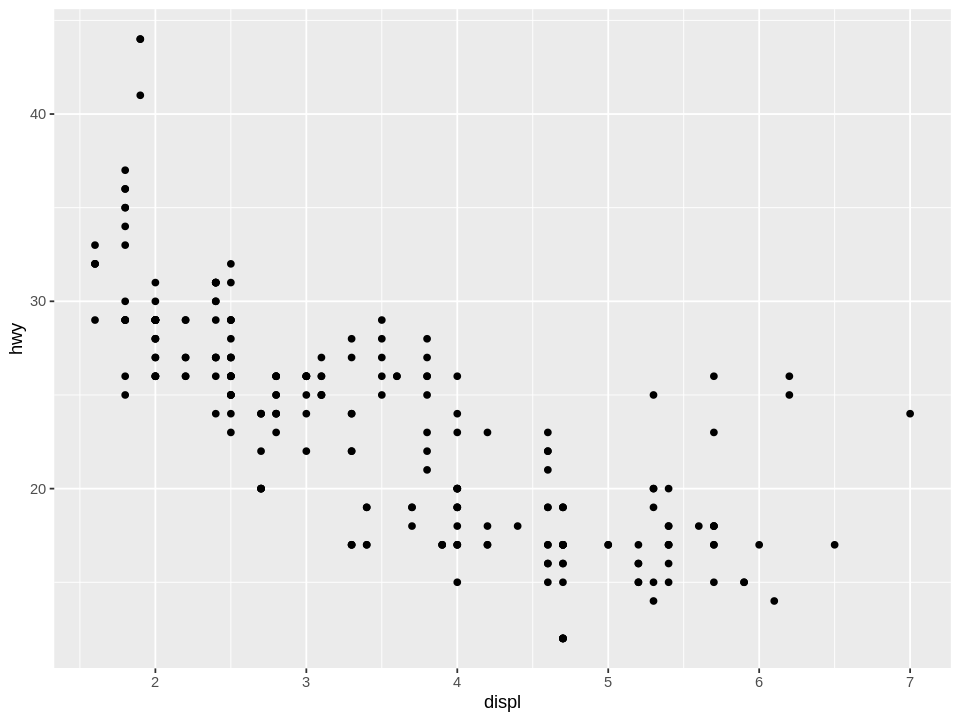

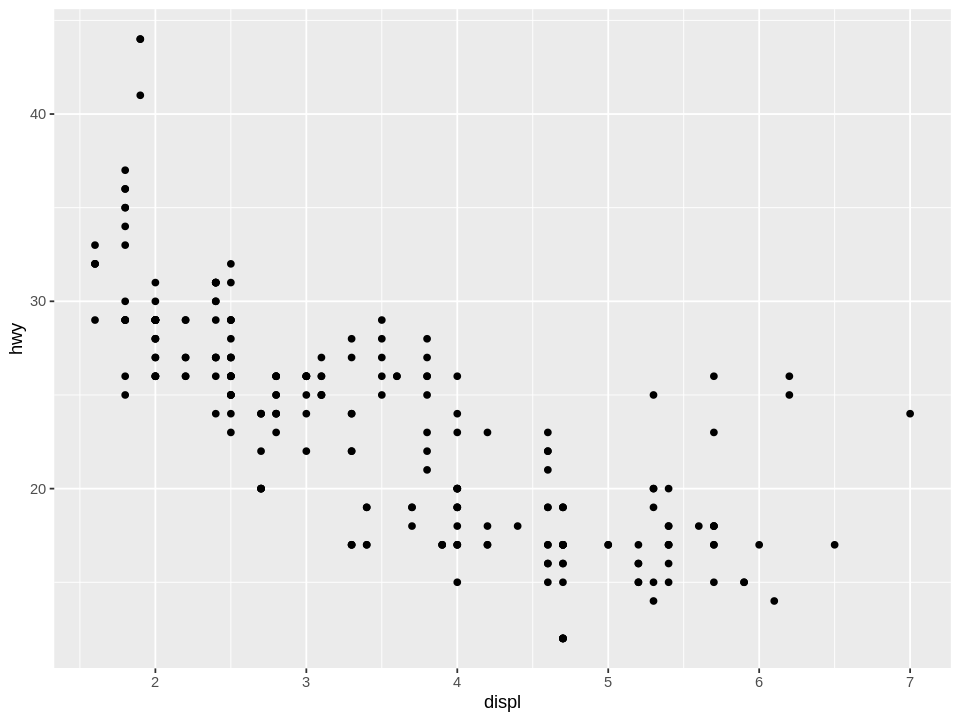

In [3]:
qplot(displ, hwy, data = mpg)
ggplot(mpg) + geom_point(aes(displ, hwy))

### Exercises

1. Run `ggplot(data = mpg)`. What do you see?
1. How many rows are in `mtcars`? How many columns?
1. What does the `drv` variable describe? Read the help for `?mpg` to find out.
1. Make a scatterplot of `hwy` versus `cyl`.
1. What happens if you make a scatterplot of `class` versus `drv`? Why is the plot not useful?

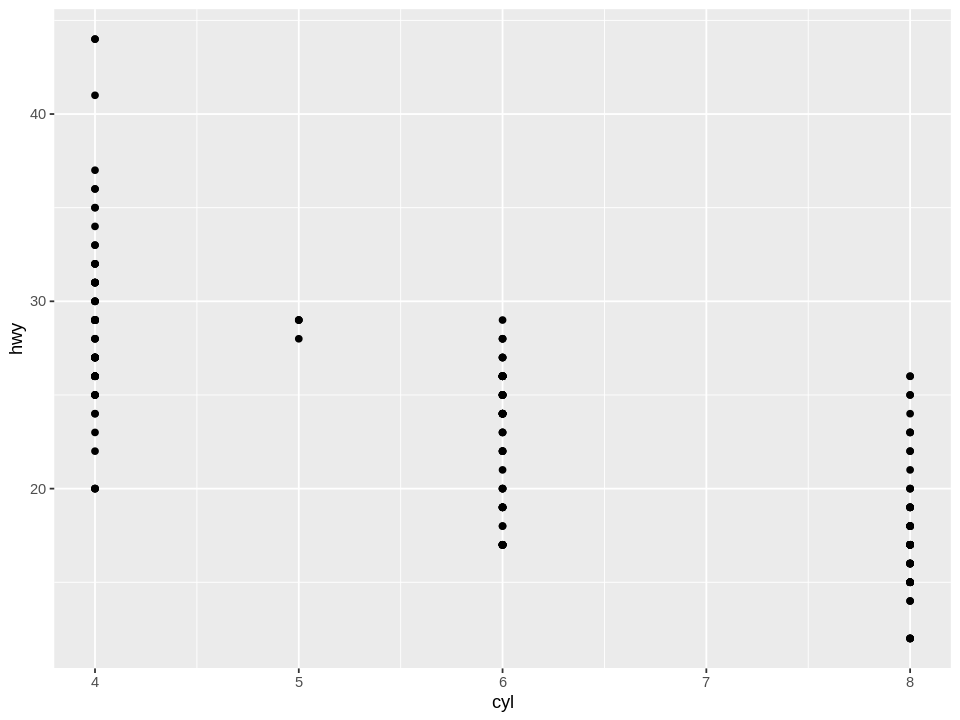

In [4]:
# 4.
qplot(cyl, hwy, data = mpg)

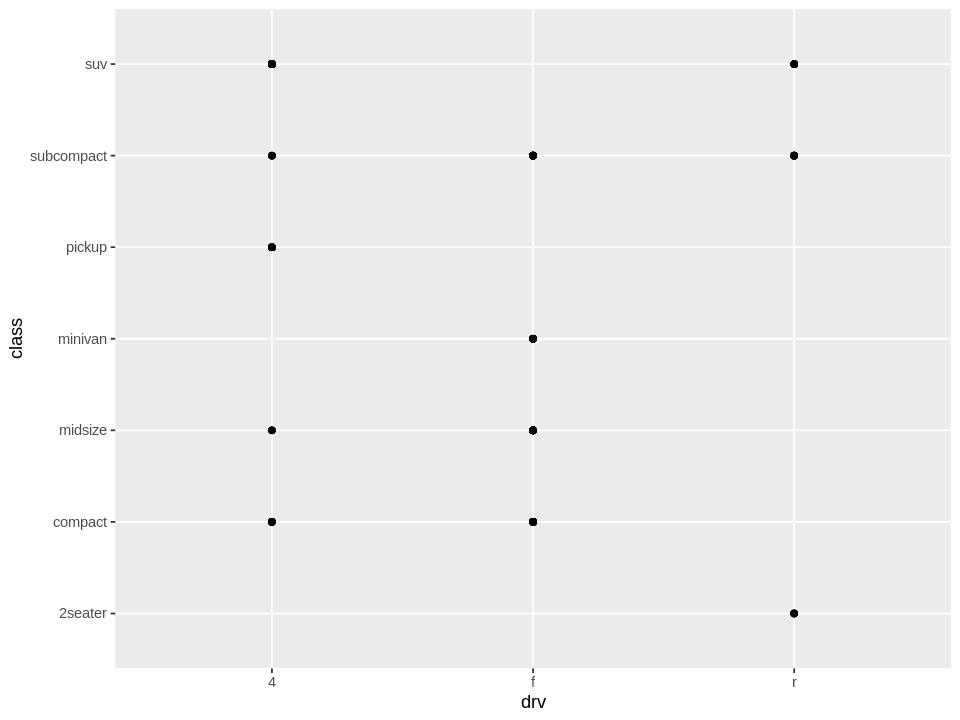

In [5]:
# 5.
qplot(drv, class, data = mpg)

## Aesthetic Mappings

> The greatest value of a picture is when it forces us to notice what we never expected to see.
> 
> <cite>—John Tukey</cite>

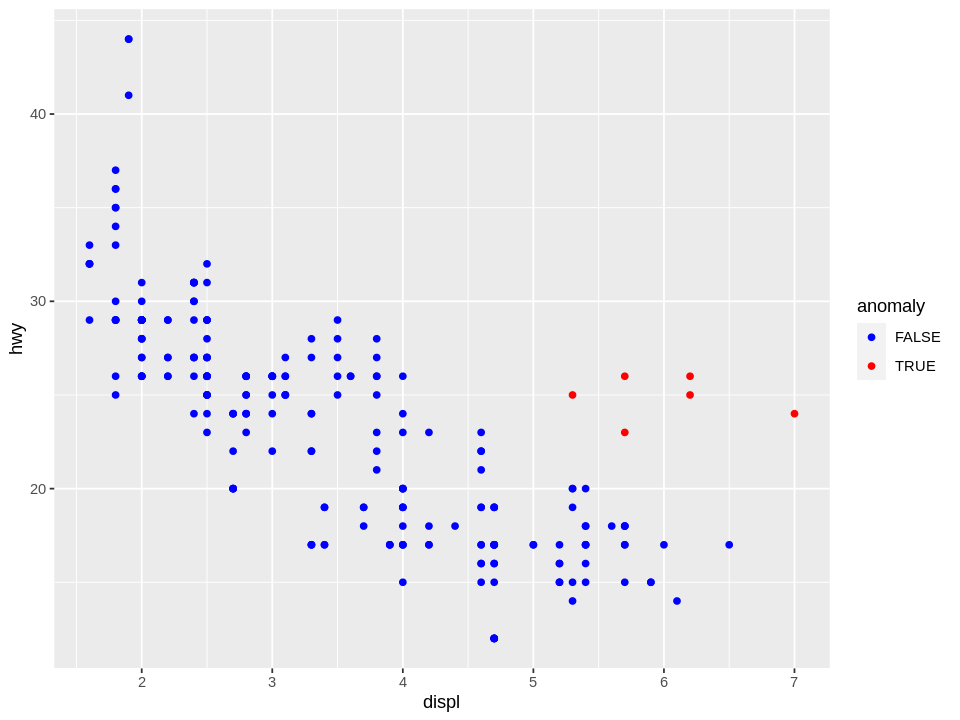

In [6]:
mutate(mpg, anomaly = displ > 5 & hwy > 20) %>%
  ggplot() +
  geom_point(aes(displ, hwy, color = anomaly)) +
  scale_color_manual(values = c("blue", "red"))

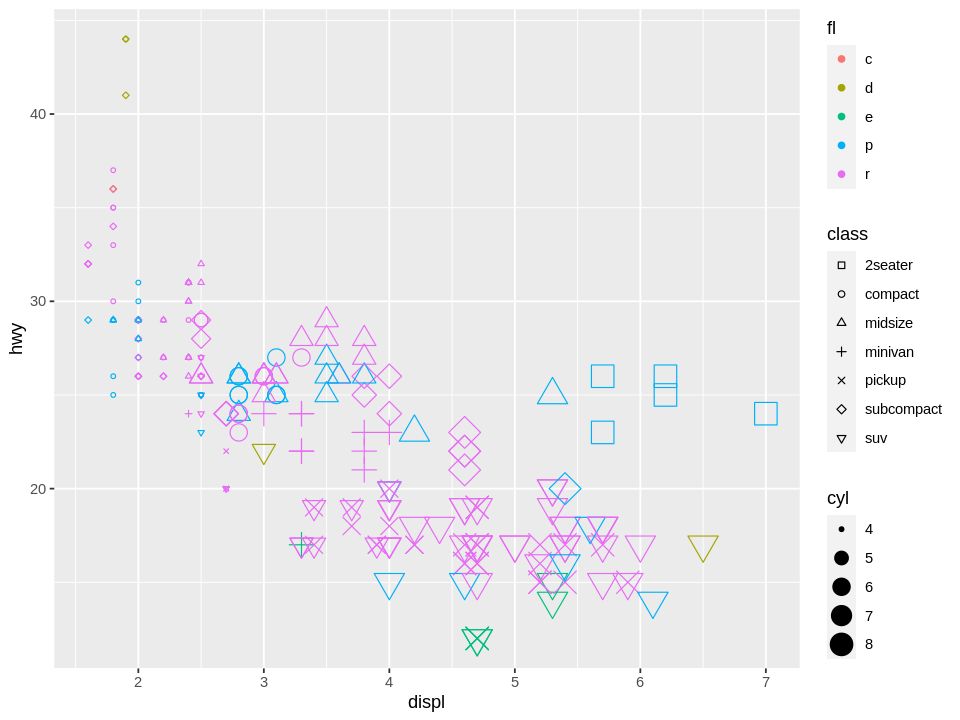

In [7]:
qplot(displ, hwy, color = fl, shape = class, size = cyl, data = mpg) +
  scale_shape_manual(values = seq(nrow(distinct(mpg, class))) - 1)

### Exercises

1. What’s gone wrong with this code? Why are the points not blue?

    ```r
    ggplot(data = mpg) +
      geom_point(
        mapping = aes(x = displ, y = hwy, color = "blue")
      )
    ```

1. Which variables in `mpg` are categorical? Which variables are continuous? (Hint: type `?mpg` to read the documentation for the dataset.) How can you see this information when you run `mpg`?
1. Map a continuous variable to `color`, `size`, and `shape`. How do these aesthetics behave differently for categorical versus continuous variables?
1. What happens if you map the same variable to multiple aesthetics?
1. What does the `stroke` aesthetic do? What shapes does it work with? (Hint: use `?geom_point`.)
1. What happens if you map an aesthetic to something other than a variable name, like `aes(color = displ < 5)`?

## Facets

> One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into *facets*, subplots that each display one subset of the data.

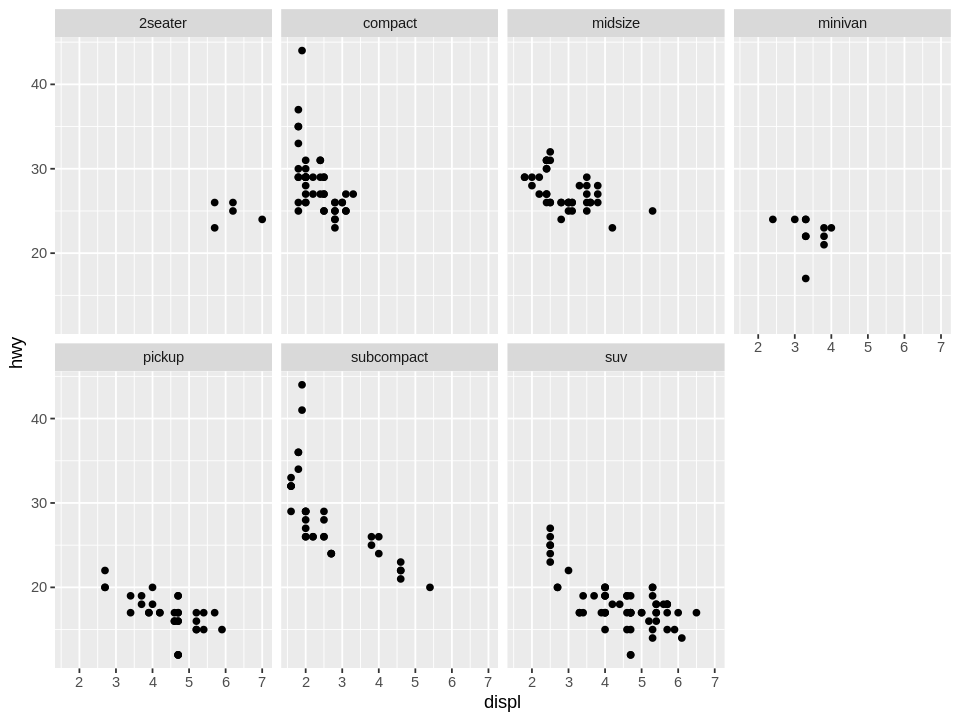

In [8]:
qplot(displ, hwy, data = mpg) + facet_wrap(~class, nrow = 2)

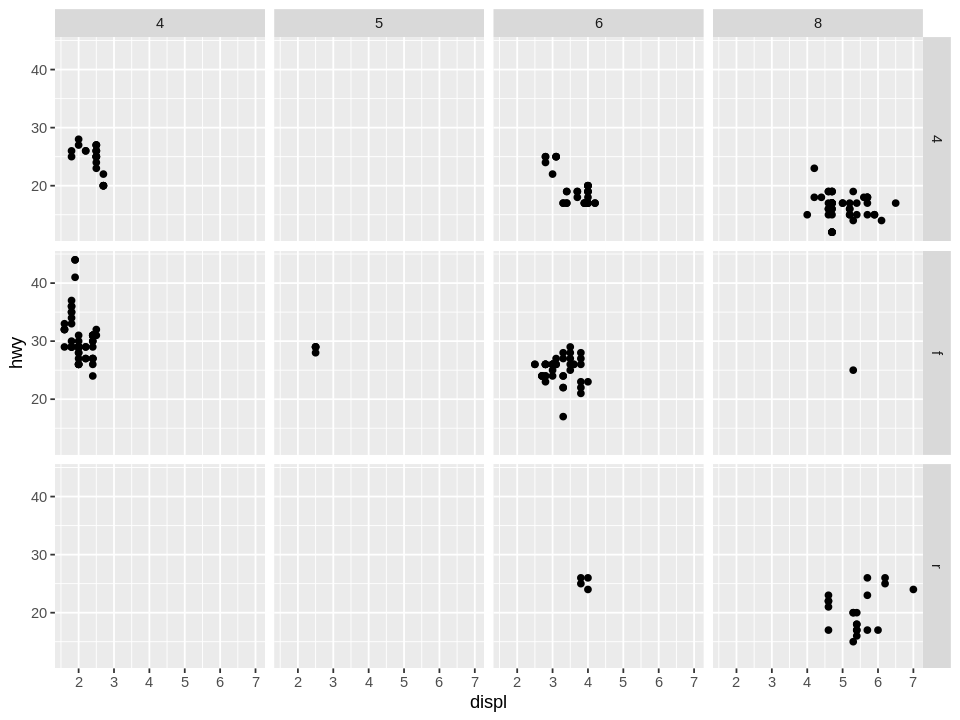

In [9]:
qplot(displ, hwy, data = mpg, facets = drv ~ cyl)

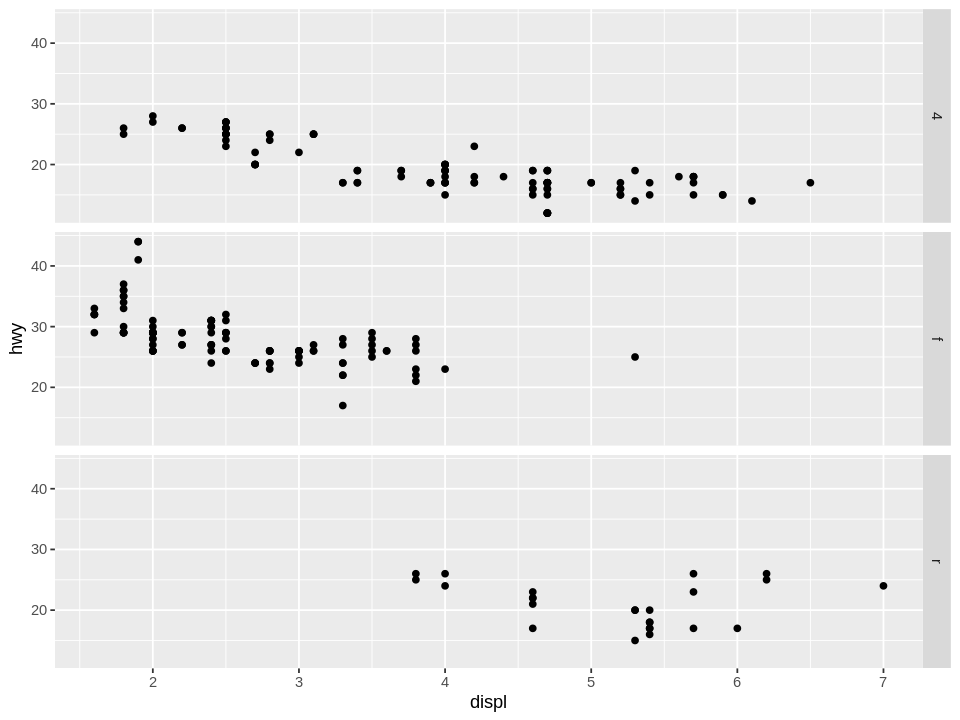

In [10]:
qplot(displ, hwy, data = mpg, facets = drv ~ .)

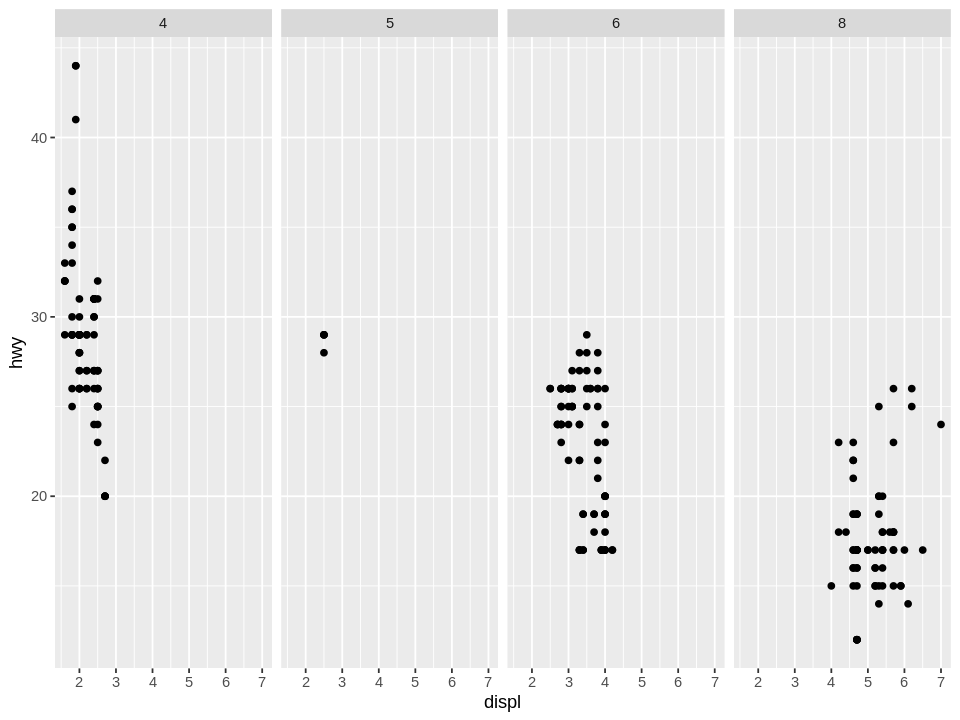

In [11]:
qplot(displ, hwy, data = mpg, facets = . ~ cyl)

### Exercises

1. What happens if you facet on a continuous variable?
1. What do the empty cells in a plot with `facet_grid(drv ~ cyl)` mean? How do they relate to this plot?

    ```r
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = drv, y = cyl))
    ```

1. What plots does the following code make? What does `.` do?

    ```r
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_grid(drv ~ .)

    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_grid(. ~ cyl)
    ```

1. Take the first faceted plot in this section:

    ```r
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_wrap(~ class, nrow = 2)
    ```

    What are the advantages to using faceting instead of the color aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?

1. Read `?facet_wrap`. What does `nrow` do? What does `ncol` do? What other options control the layout of the individual panels? Why doesn’t `facet_grid()` have `nrow` and `ncol` variables?
1. When using `facet_grid()` you should usually put the variable with more unique levels in the columns. Why?

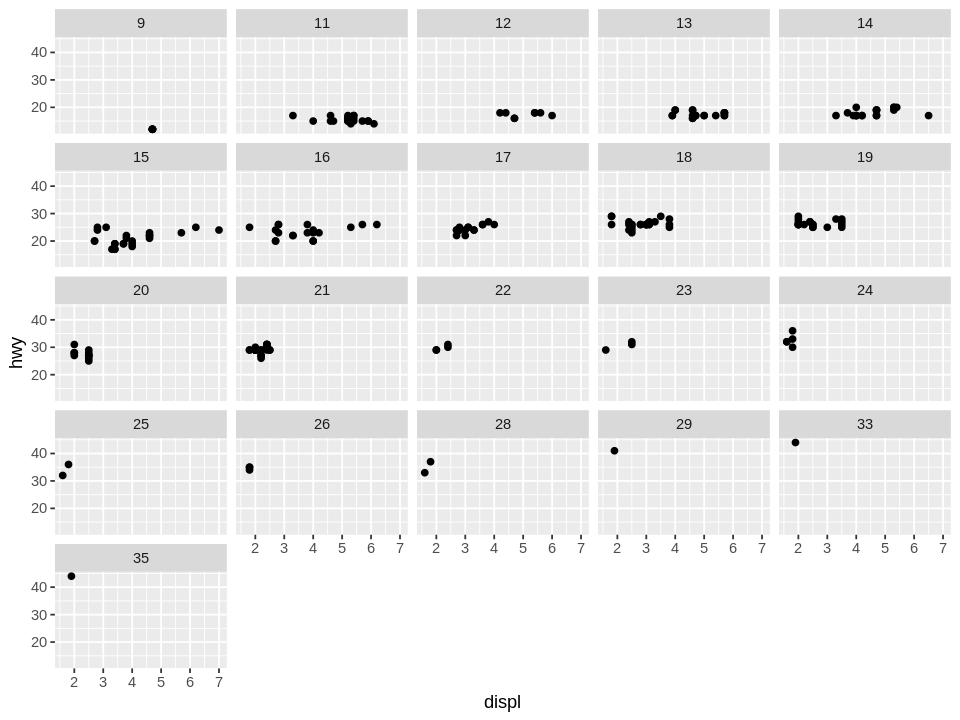

In [12]:
# 1.
qplot(displ, hwy, data = mpg, facets = ~cty)

## Geometric Objects

> A *geom* is the geometrical object that a plot uses to represent data. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on.

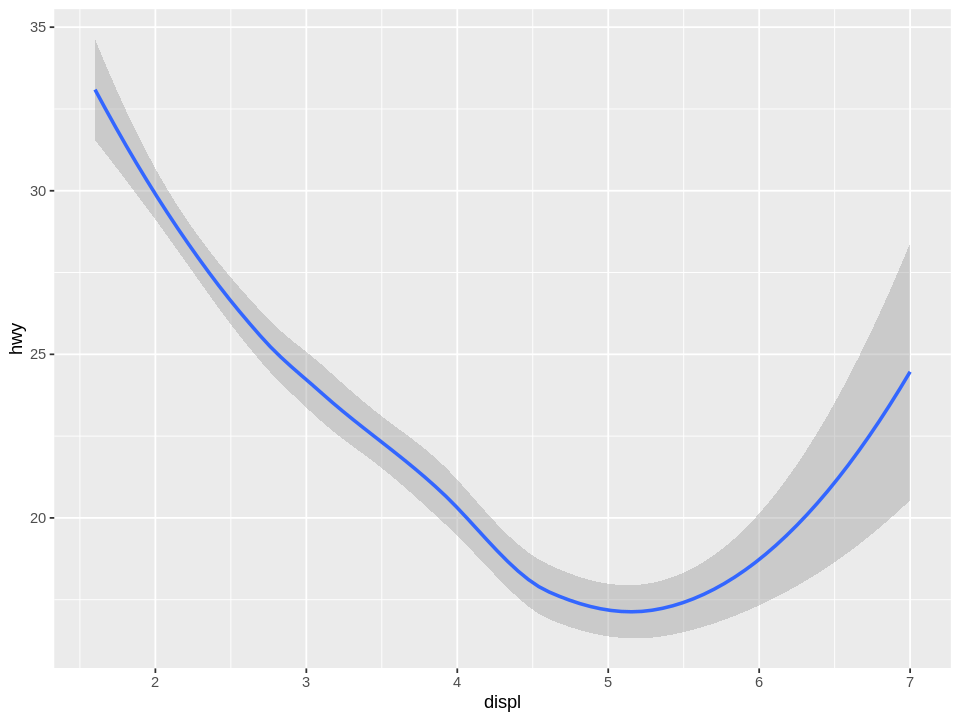

In [13]:
ggplot(mpg) + geom_smooth(aes(displ, hwy), formula = y ~ x, method = "loess")

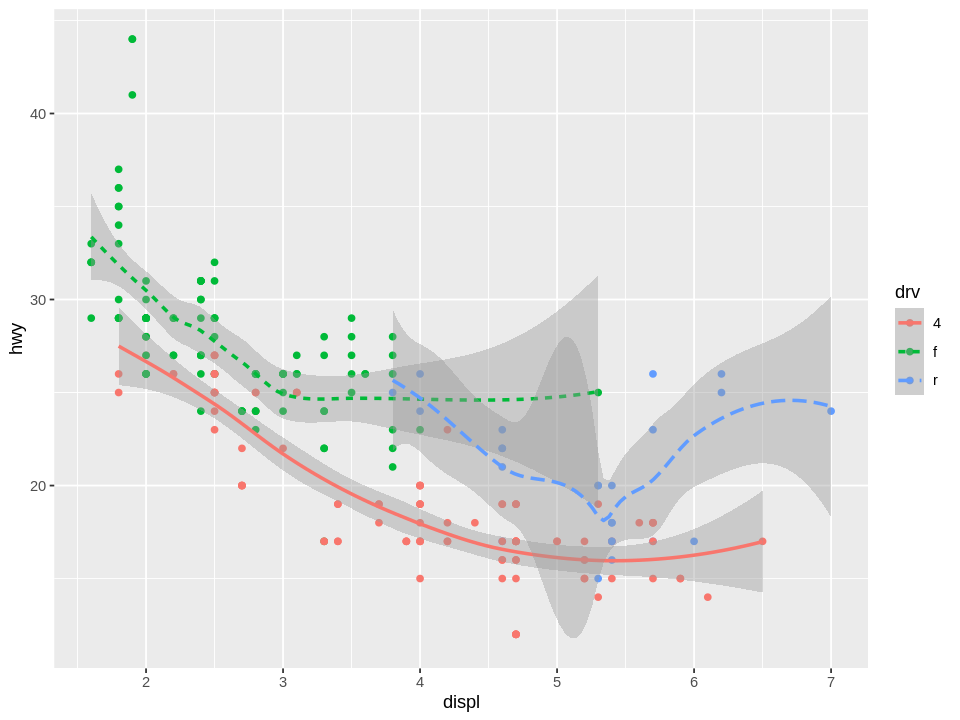

In [14]:
qplot(displ, hwy, color = drv, data = mpg) +
  geom_smooth(aes(displ, hwy, color = drv, linetype = drv), formula = y ~ x, method = "loess")

> **ggplot2** provides over 30 geoms, and extension packages provide even more (see *http://exts.ggplot2.tidyverse.org* for a sampling). The best way to get a comprehensive overview is the **ggplot2** cheatsheet, which you can find at *https://rstudio.com/resources/cheatsheets/*.

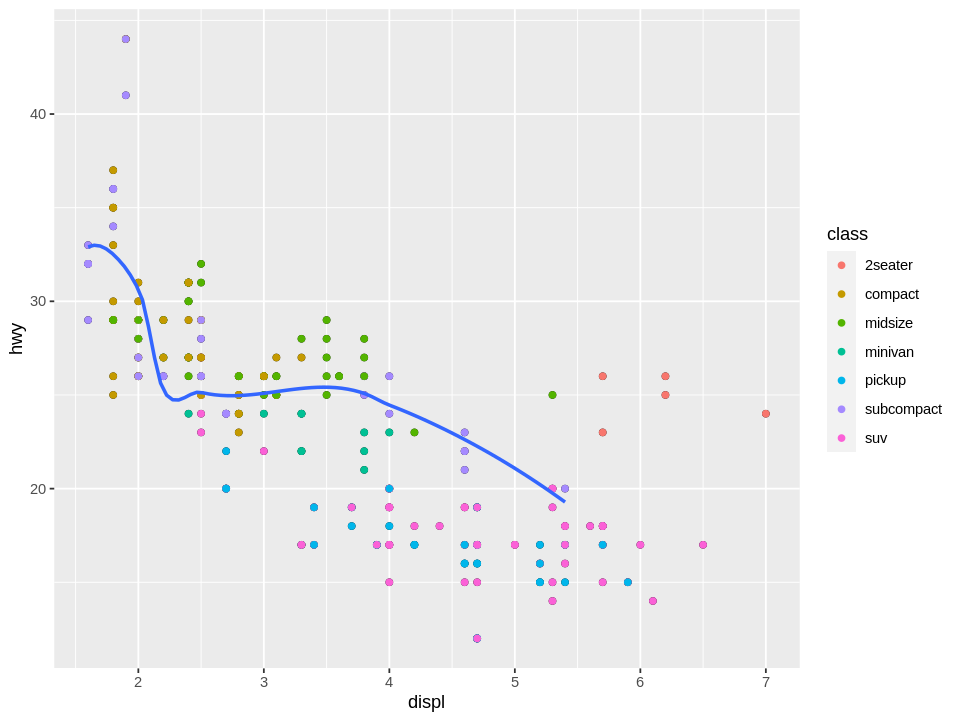

In [15]:
qplot(displ, hwy, data = mpg) +
  geom_point(aes(color = class)) +
  geom_smooth(data = filter(mpg, class == "subcompact"), formula = y ~ x, method = "loess", se = FALSE)

### Exercises

1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?
1. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions:

    ```r
    ggplot(
      data = mpg,
      mapping = aes(x = displ, y = hwy, color = drv)
    ) +
      geom_point() +
      geom_smooth(se = FALSE)
    ```

1. What does `show.legend = FALSE` do? What happens if you remove it? Why do you think I used it earlier in the chapter?
1. What does the `se` argument to `geom_smooth()` do?
1. Will these two graphs look different? Why/why not?

    ```r
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
      geom_point() +
      geom_smooth()

    ggplot() +
      geom_point(
        data = mpg,
        mapping = aes(x = displ, y = hwy)
      ) +
      geom_smooth(
        data = mpg,
        mapping = aes(x = displ, y = hwy)
      )
    ```

1. Re-create the R code necessary to generate the following graphs.

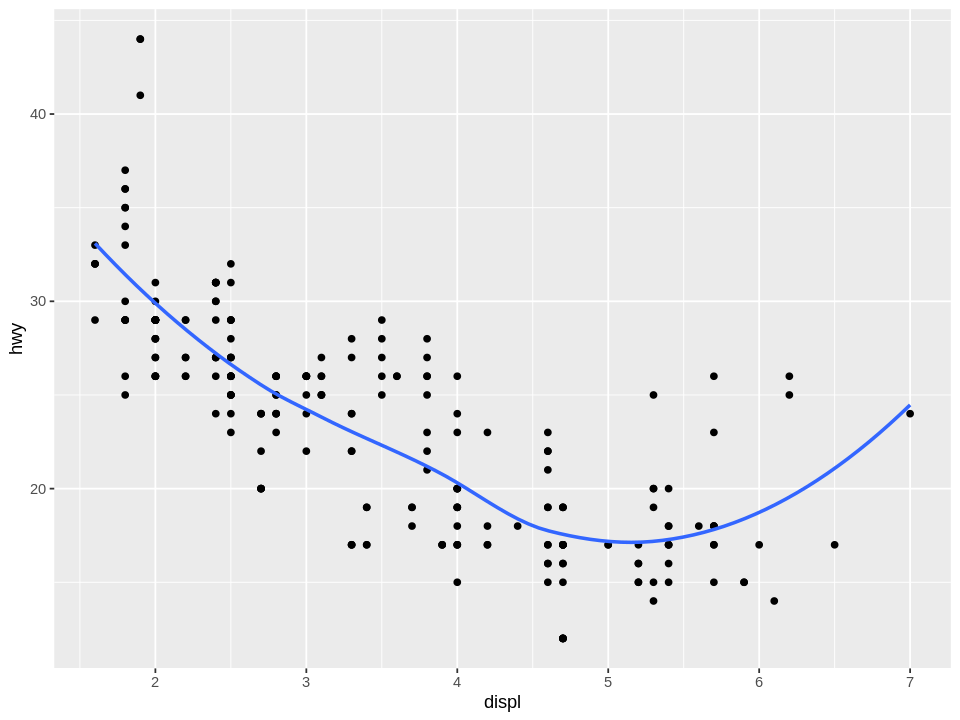

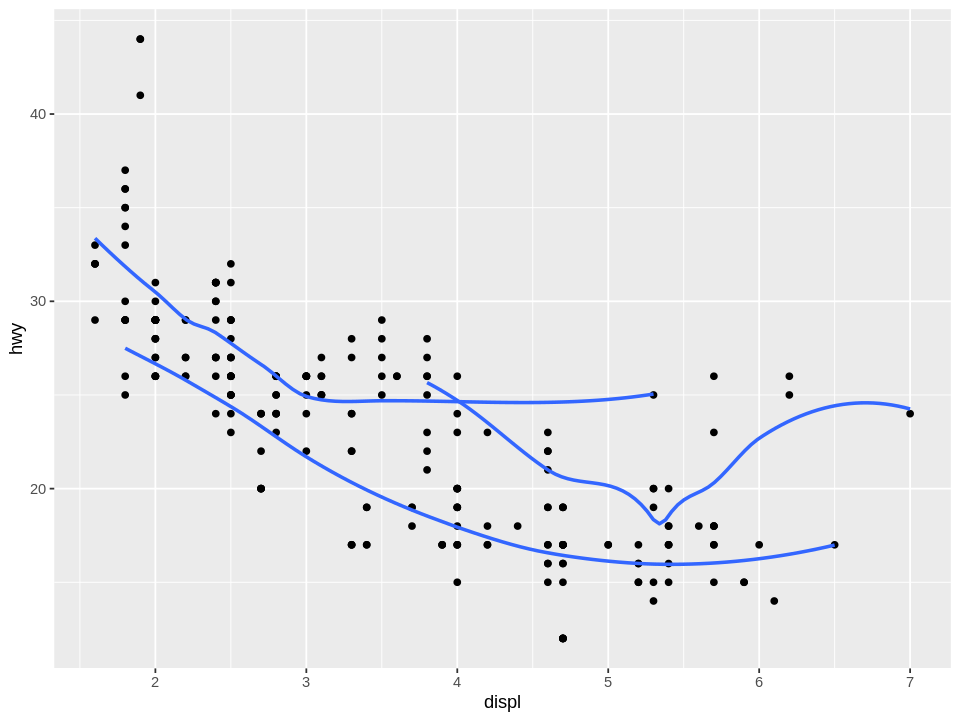

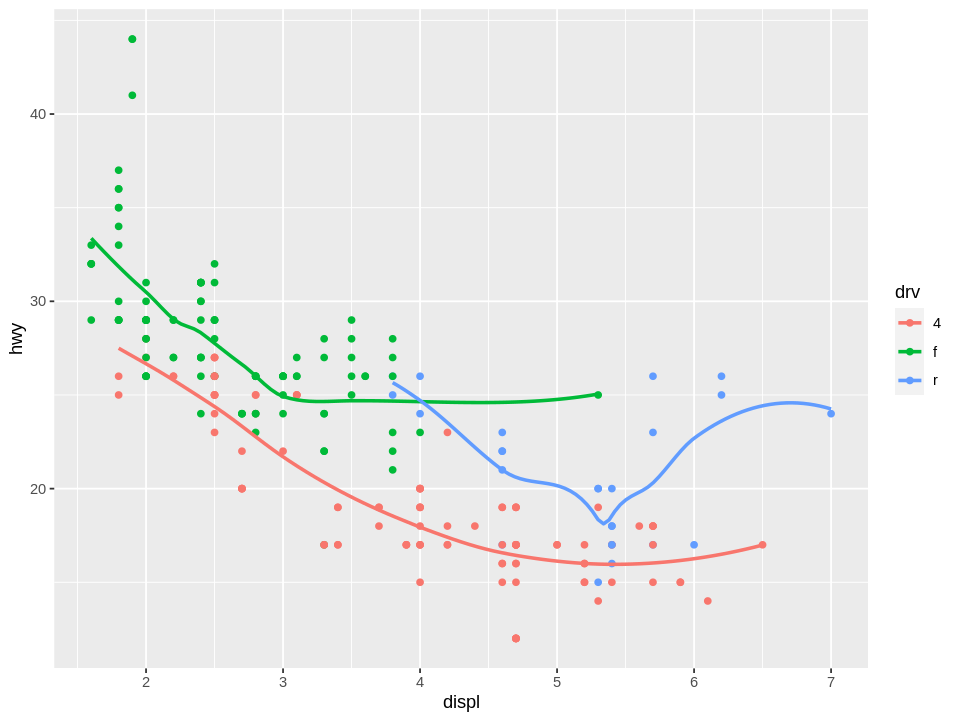

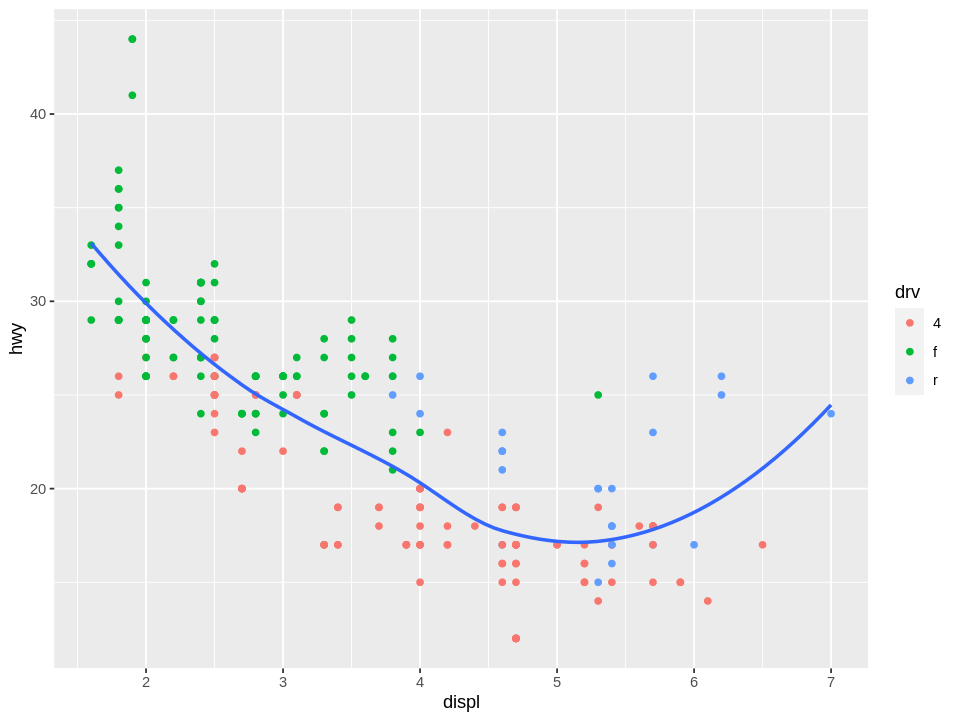

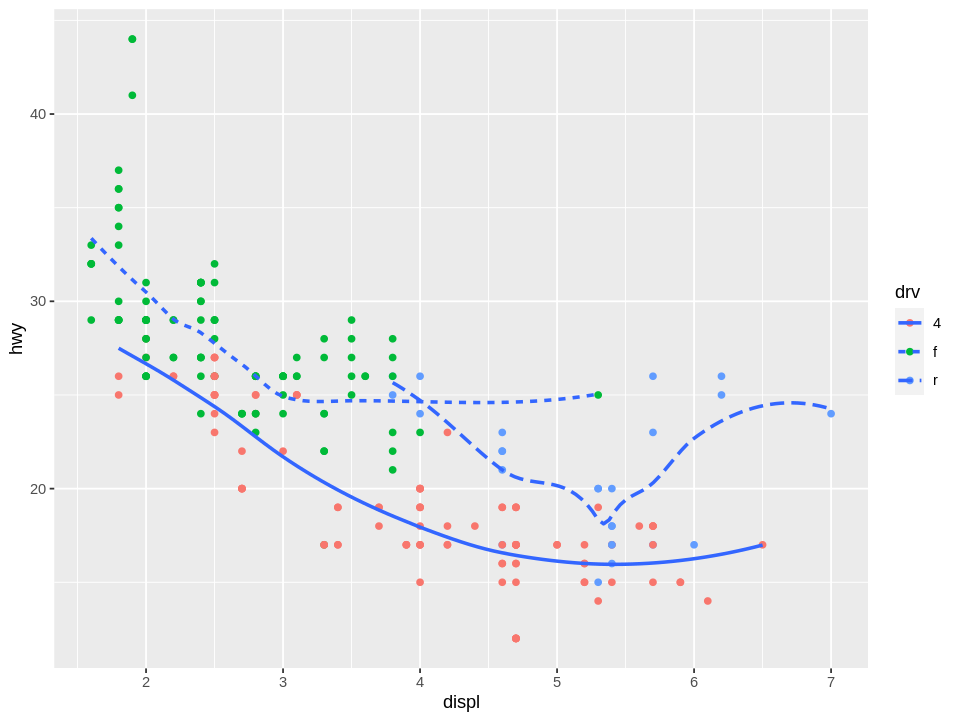

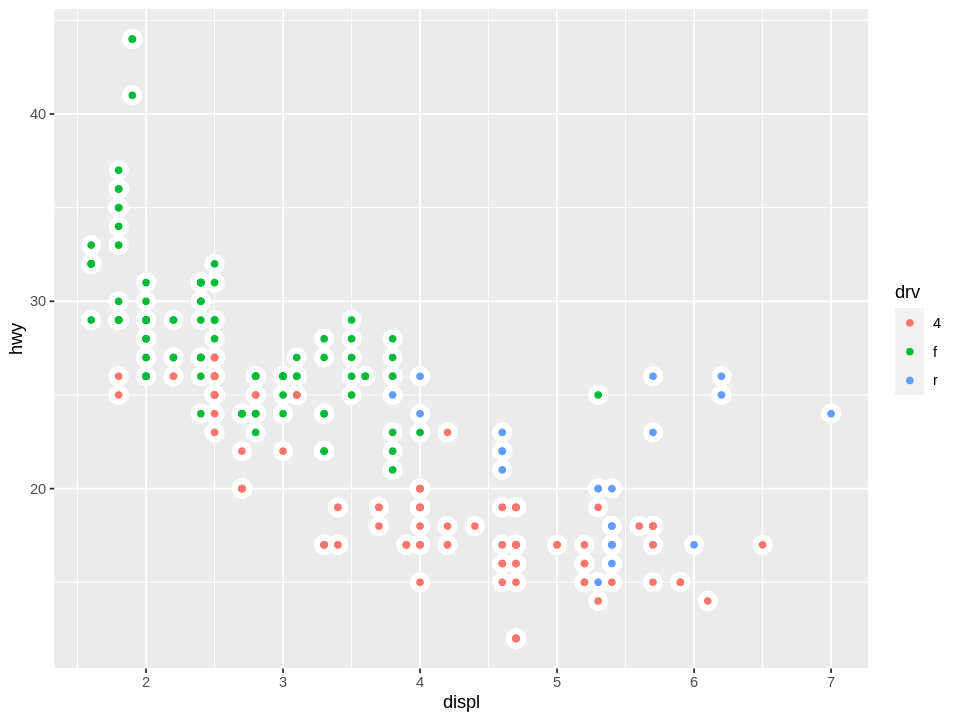

In [16]:
# 6.
qplot(displ, hwy, data = mpg) +
  geom_smooth(formula = y ~ x, method = "loess", se = FALSE)

qplot(displ, hwy, data = mpg) +
  geom_smooth(aes(group = drv), formula = y ~ x, method = "loess", se = FALSE)

qplot(displ, hwy, color = drv, data = mpg) +
  geom_smooth(formula = y ~ x, method = "loess", se = FALSE)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  geom_smooth(formula = y ~ x, method = "loess", se = FALSE)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  geom_smooth(aes(linetype = drv), formula = y ~ x, method = "loess", se = FALSE)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(color = "white", size = 5) +
  geom_point(aes(color = drv))

## Statistical Transformations

In [17]:
summary(diamonds)
head(diamonds)
?diamonds

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


diamonds {ggplot2},R Documentation


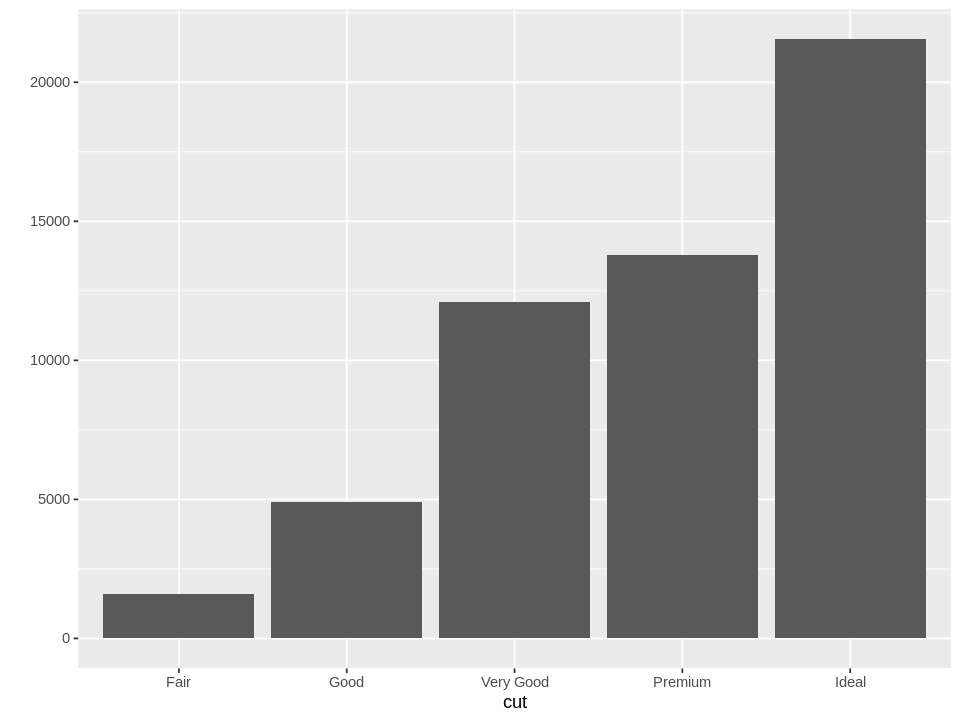

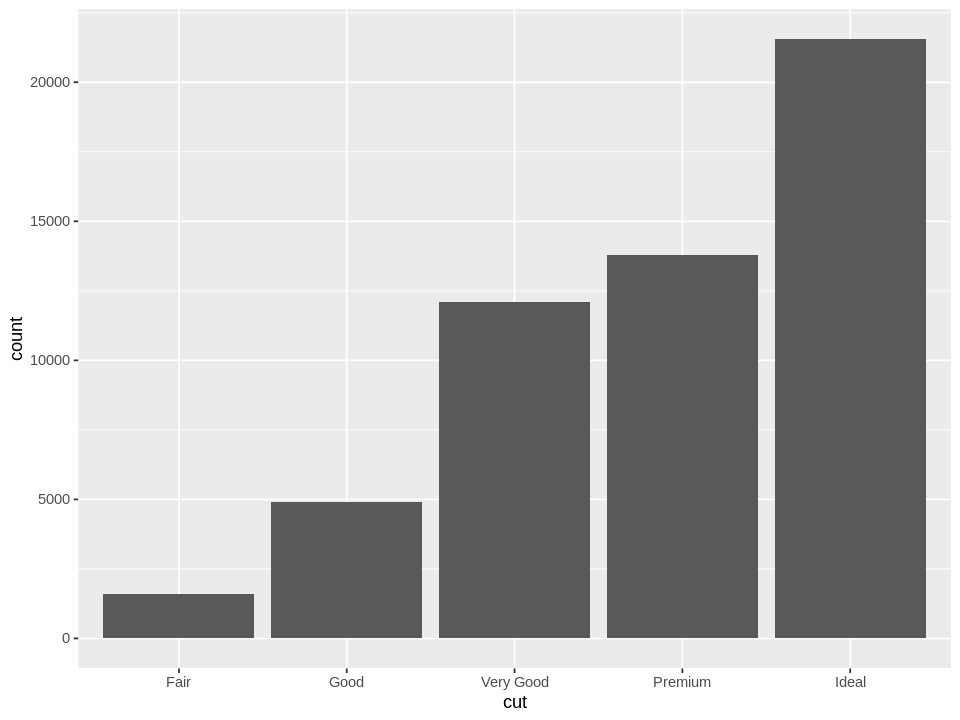

In [18]:
qplot(cut, data = diamonds)
ggplot(diamonds) + geom_bar(aes(cut))

> Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot:
> 1. Bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.
> 1. Smoothers fit a model to your data and then plot predictions from the model.
> 1. Boxplots compute a robust summary of the distribution and display a specially formatted box.
>
> The algorithm used to calculate new values for a graph is called a *stat*, short for statistical transformation.
>
> <img width="800" src="https://web.archive.org/web/20201226121303if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_01in23.png" />
> 
> You can learn which stat a geom uses by inspecting the default value for the stat argument. For example, `?geom_bar` shows the default value for `stat` is “count,” which means that `geom_bar()` uses `stat_count()`.

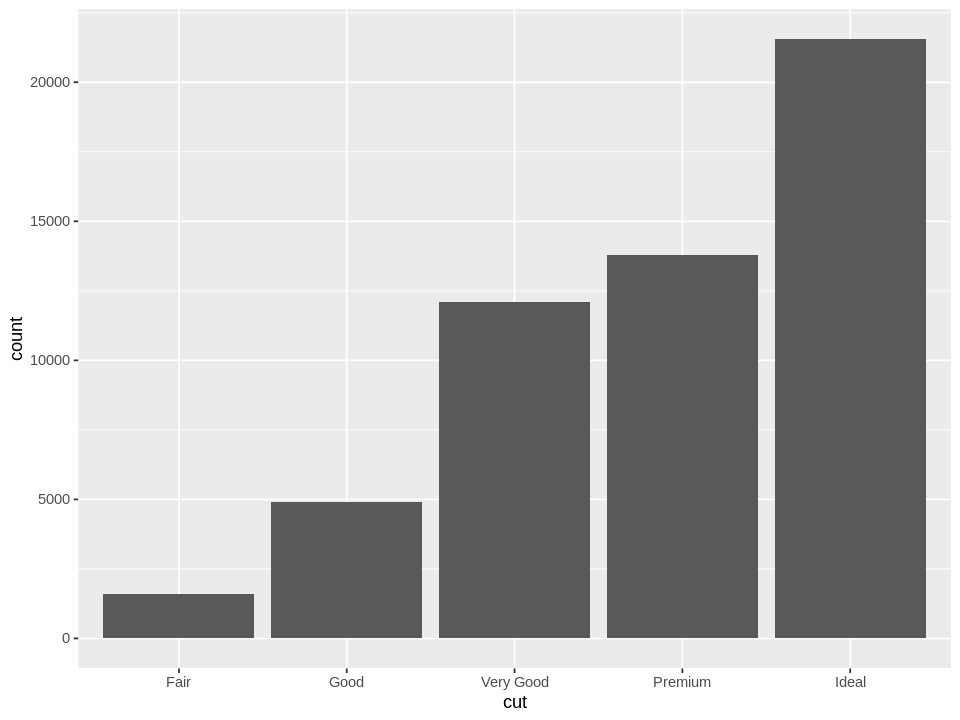

In [19]:
ggplot(diamonds) + stat_count(aes(cut))

> You might want to override the default mapping from transformed variables to aesthetics. For example, you might want to display a bar chart of proportion, rather than count:

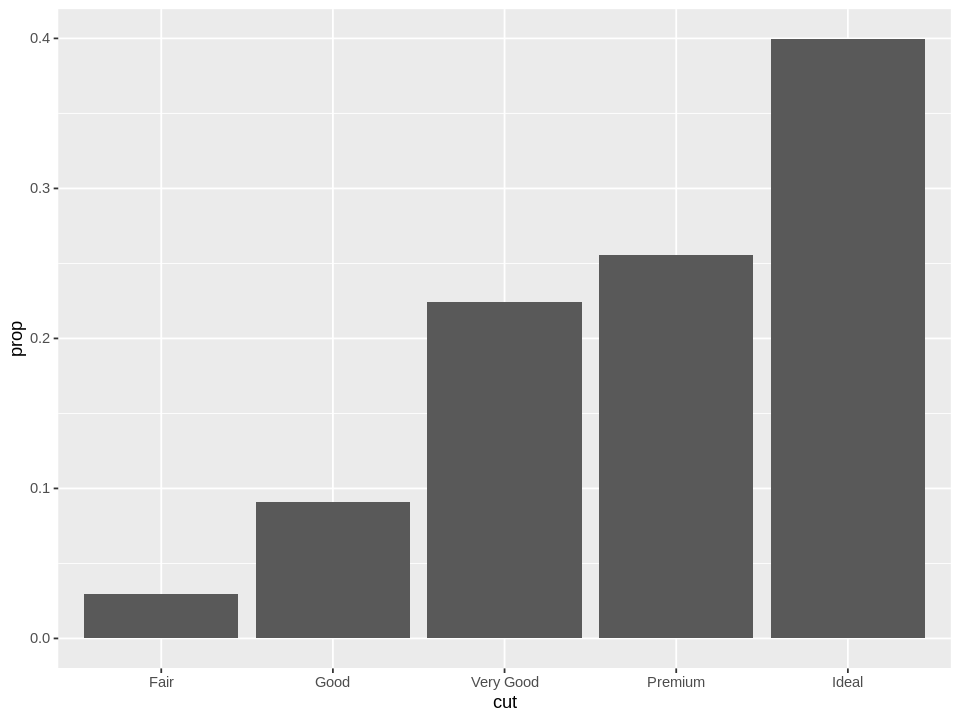

In [20]:
ggplot(diamonds) + geom_bar(aes(cut, ..prop.., group = 1))

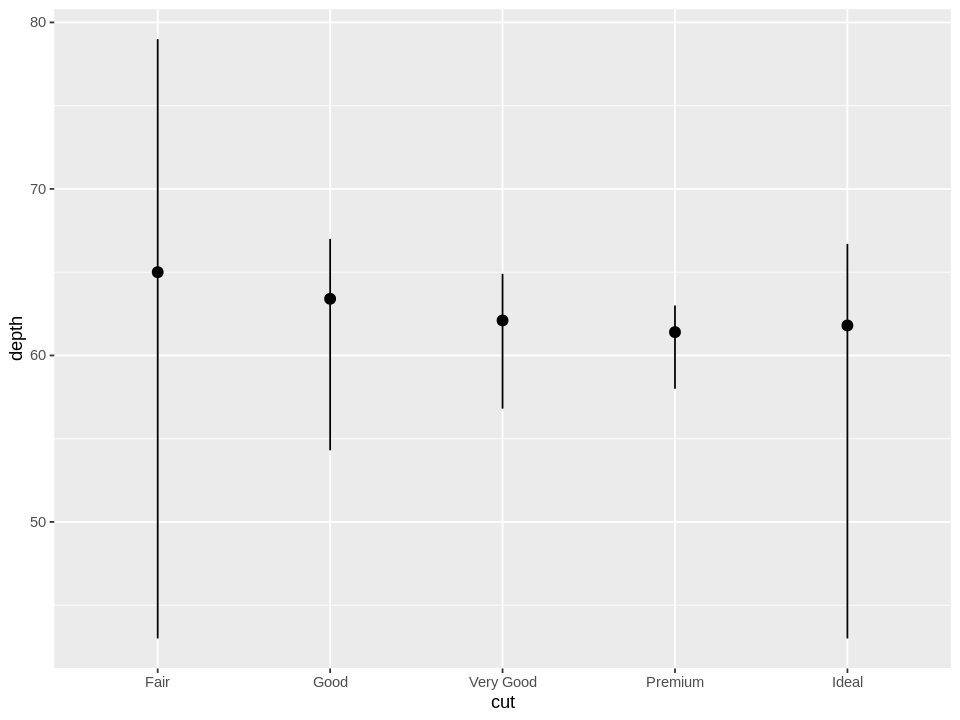

In [21]:
ggplot(diamonds) + stat_summary(aes(cut, depth), fun = median, fun.max = max, fun.min = min)

### Exercises

1. What is the default geom associated with `stat_summary()`? How could you rewrite the previous plot to use that geom function instead of the stat function?
1. What does `geom_col()` do? How is it different to `geom_bar()`?
1. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
1. What variables does `stat_smooth()` compute? What parameters control its behavior?
1. In our proportion bar chart, we need to set `group = 1`. Why? In other words what is the problem with these two graphs?

    ```r
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, y = ..prop..))
    ggplot(data = diamonds) +
      geom_bar(
        mapping = aes(x = cut, fill = color, y = ..prop..)
      )
    ```

## Position Adjustments

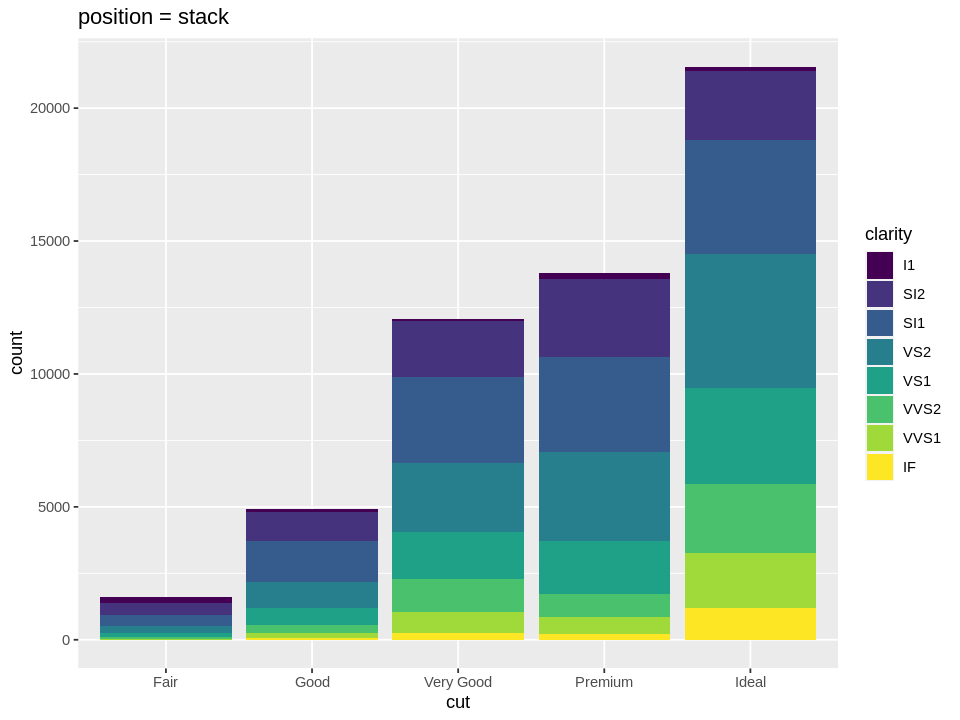

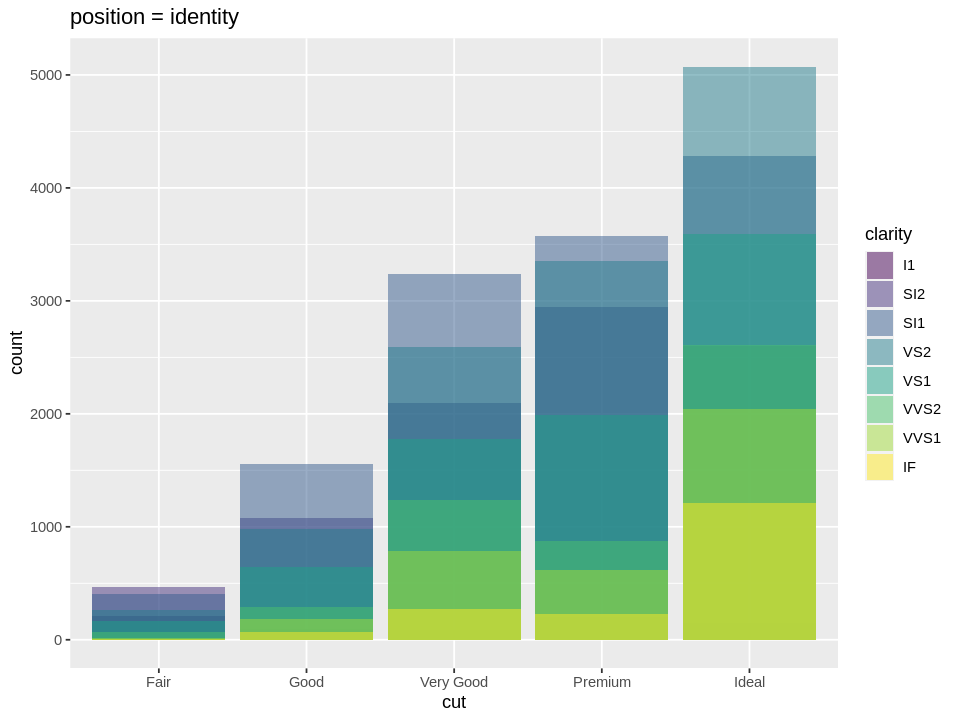

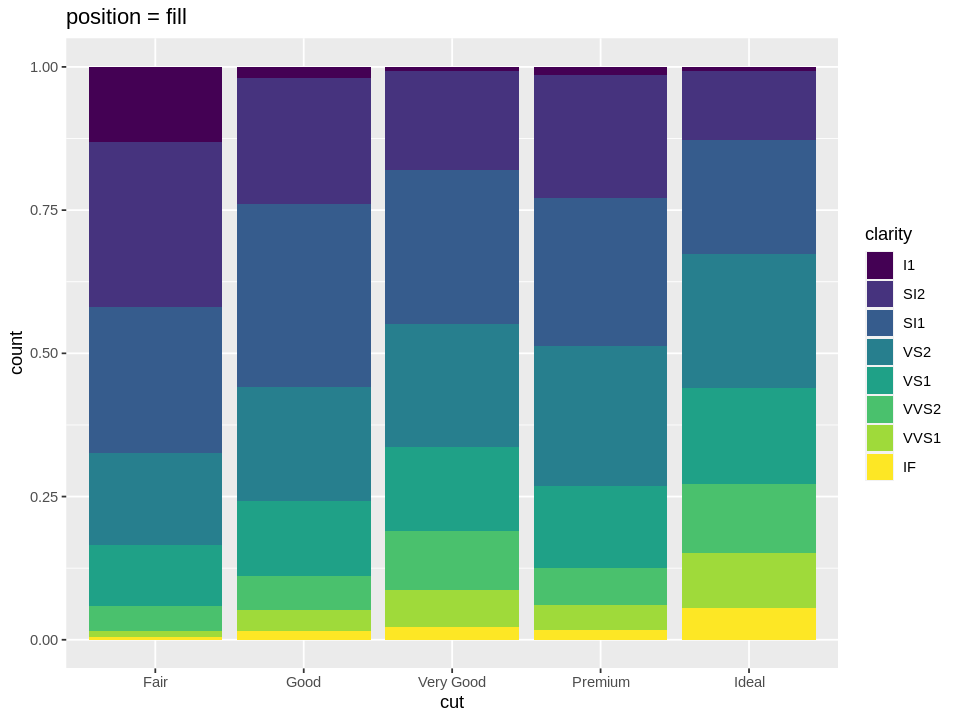

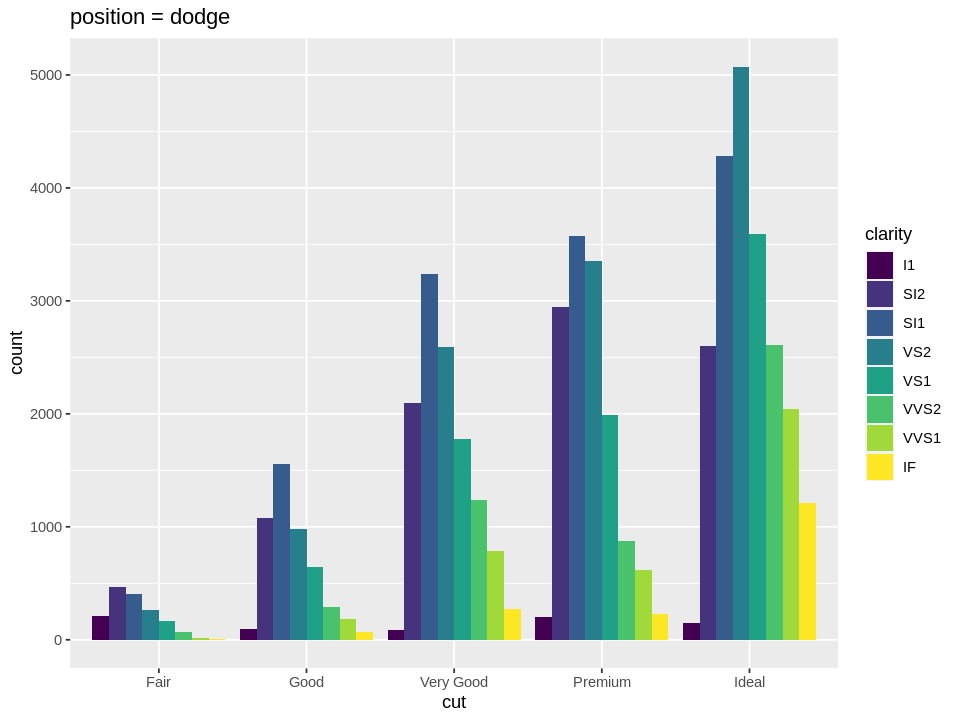

In [22]:
for (position in c("stack", "identity", "fill", "dodge")) {
  print(
    ggplot(diamonds) +
      geom_bar(
        aes(cut, fill = clarity),
        alpha = ifelse(position == "identity", .5, 1.),
        position = position
      ) +
      ggtitle(str_interp("position = ${position}"))
  )
}

> The values of `hwy` and `displ` are rounded so the points appear on a grid and many points overlap each other. This problem is known as *overplotting*. This arrangement makes it hard to see where the mass of the data is. `position = "jitter"` adds a small amount of random noise to each point. Adding randomness seems like a strange way to improve your plot, but while it makes your graph less accurate at small scales, it makes your graph more revealing at large scales.

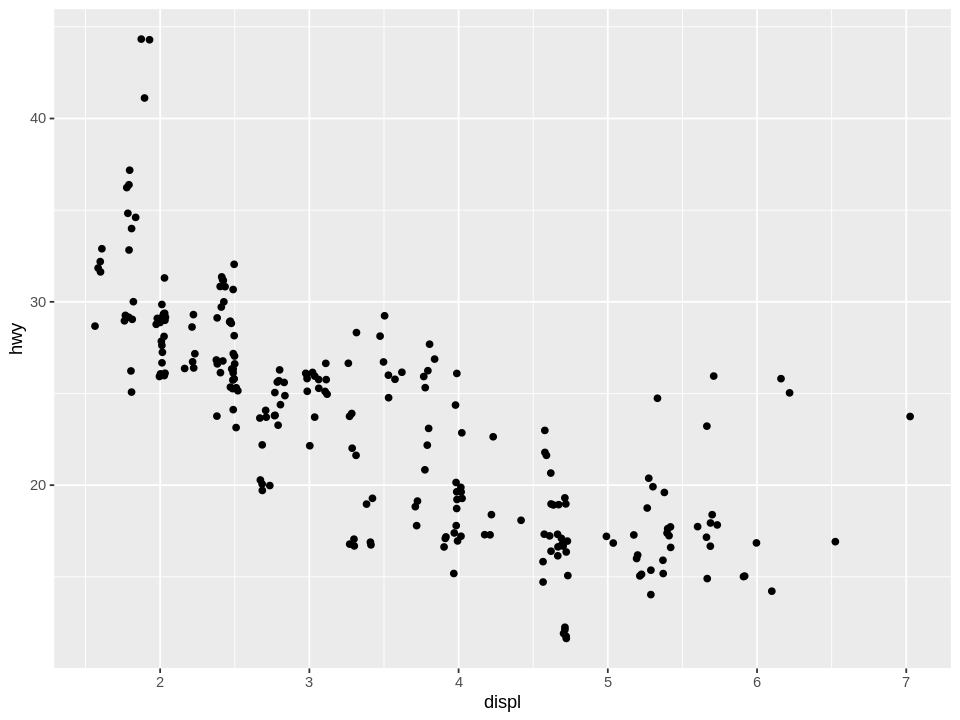

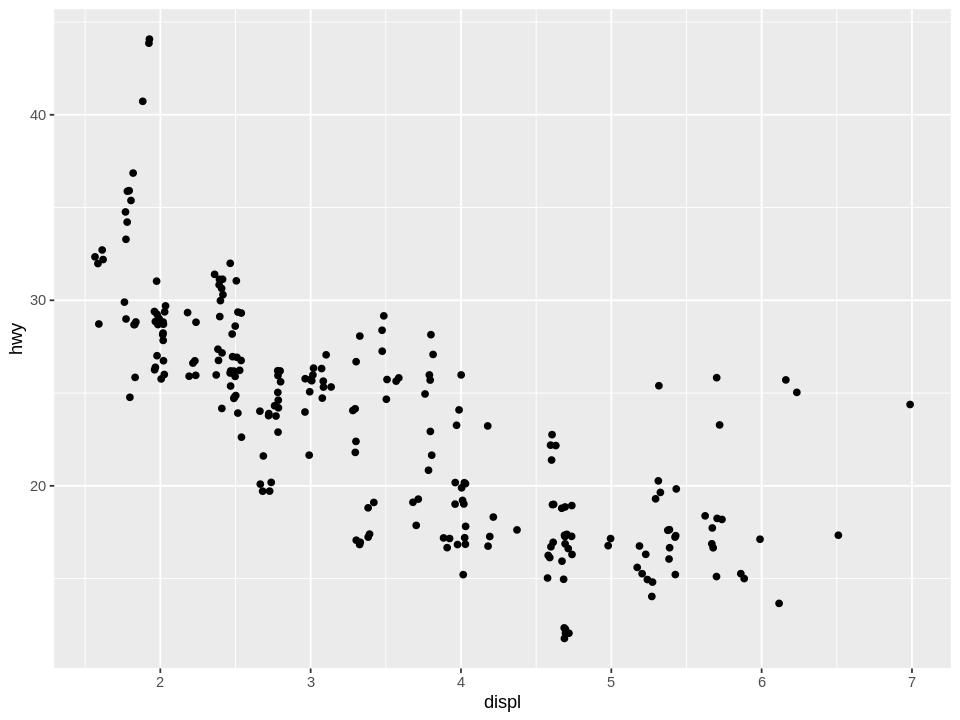

In [23]:
ggplot(mpg) + geom_point(aes(displ, hwy), position = "jitter")
ggplot(mpg) + geom_jitter(aes(displ, hwy))

### Exercises

1. What is the problem with this plot? How could you improve it?

    ```r
    ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
      geom_point()
    ```

1. What parameters to `geom_jitter()` control the amount of jittering?
1. Compare and contrast `geom_jitter()` with `geom_count()`.
1. What’s the default position adjustment for `geom_boxplot()`? Create a visualization of the `mpg` dataset that demonstrates it.

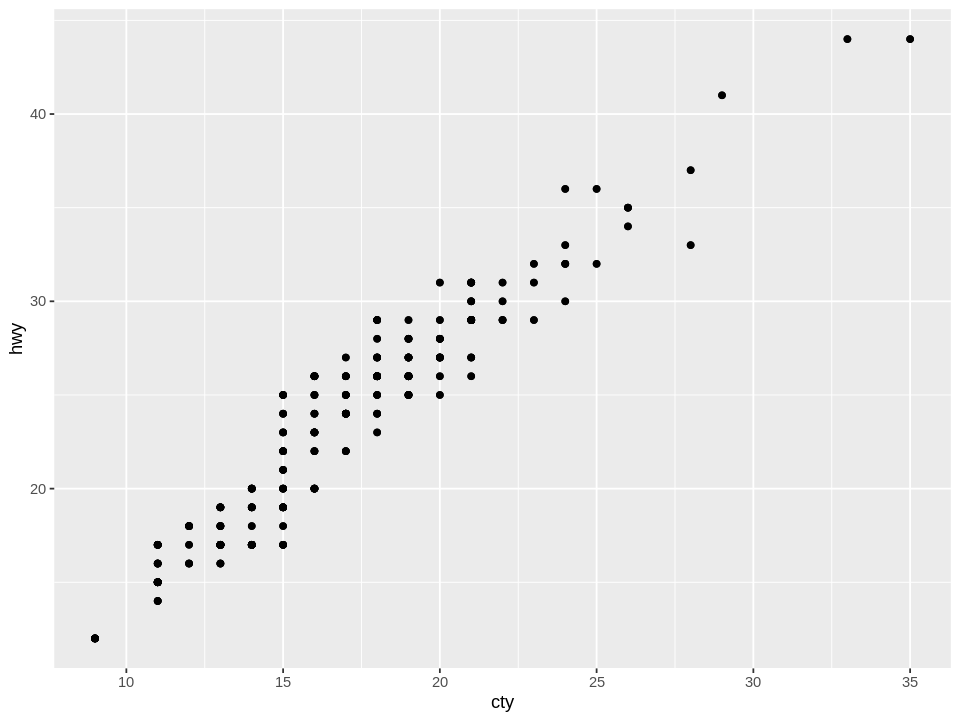

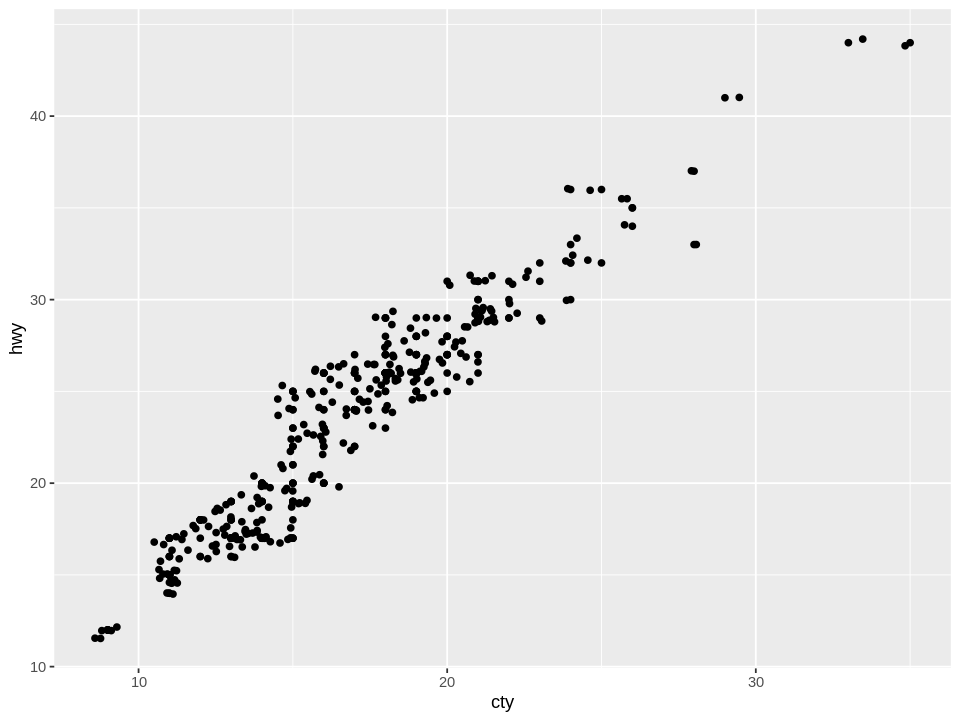

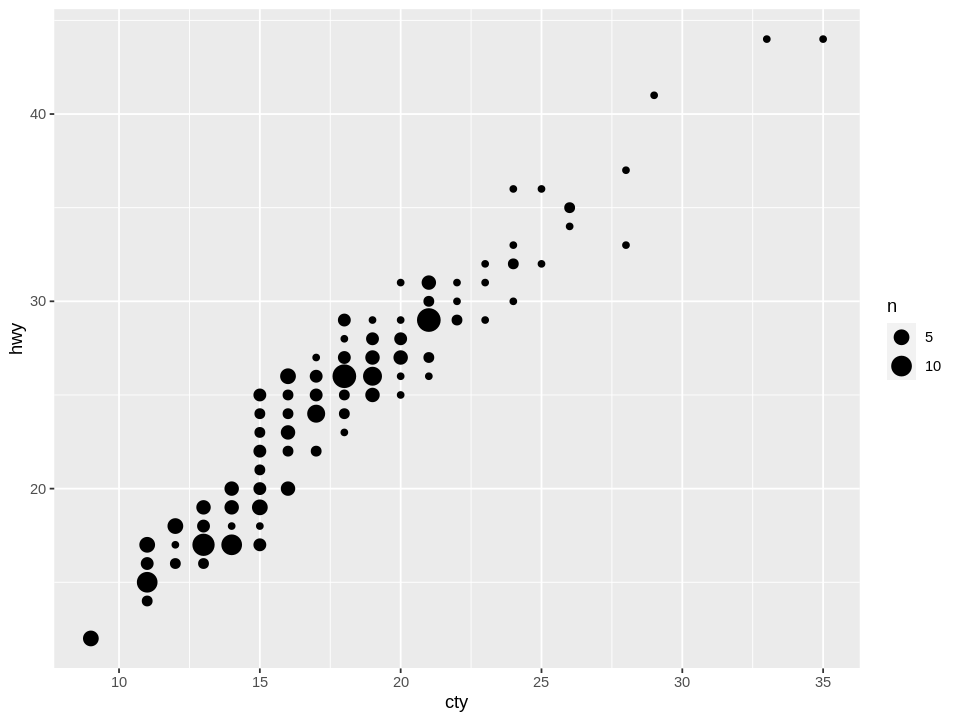

In [24]:
# 1,2,3.
qplot(cty, hwy, data = mpg) + geom_point()
qplot(cty, hwy, data = mpg) + geom_jitter(height = .5, width = .5)
qplot(cty, hwy, data = mpg) + geom_count()

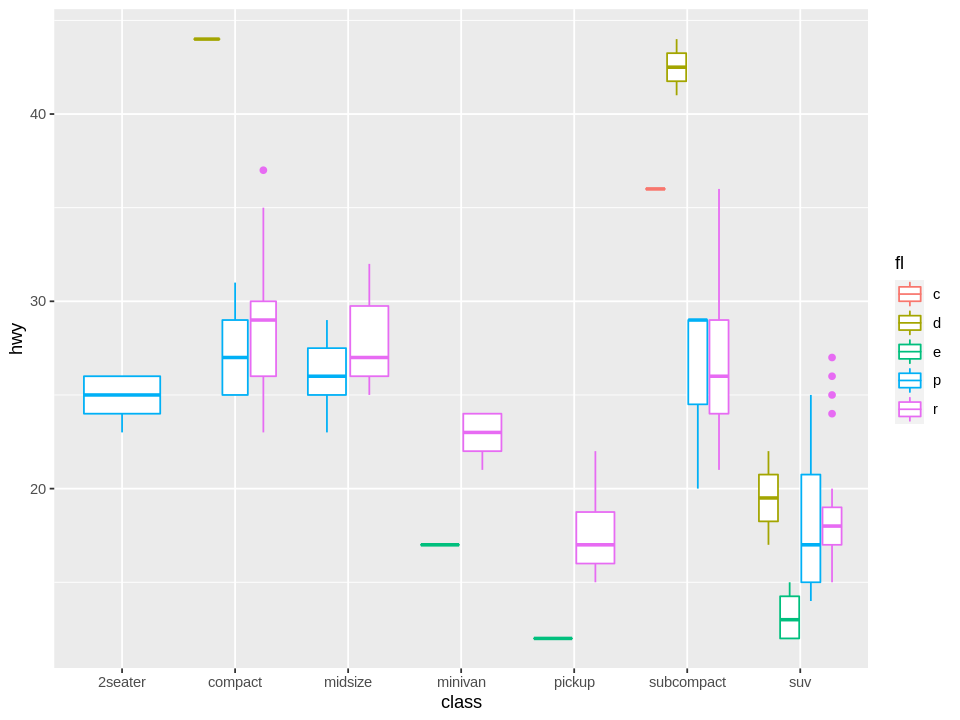

In [25]:
# 4.
ggplot(mpg) + geom_boxplot(aes(class, hwy, color = fl))

## Coordinate Systems

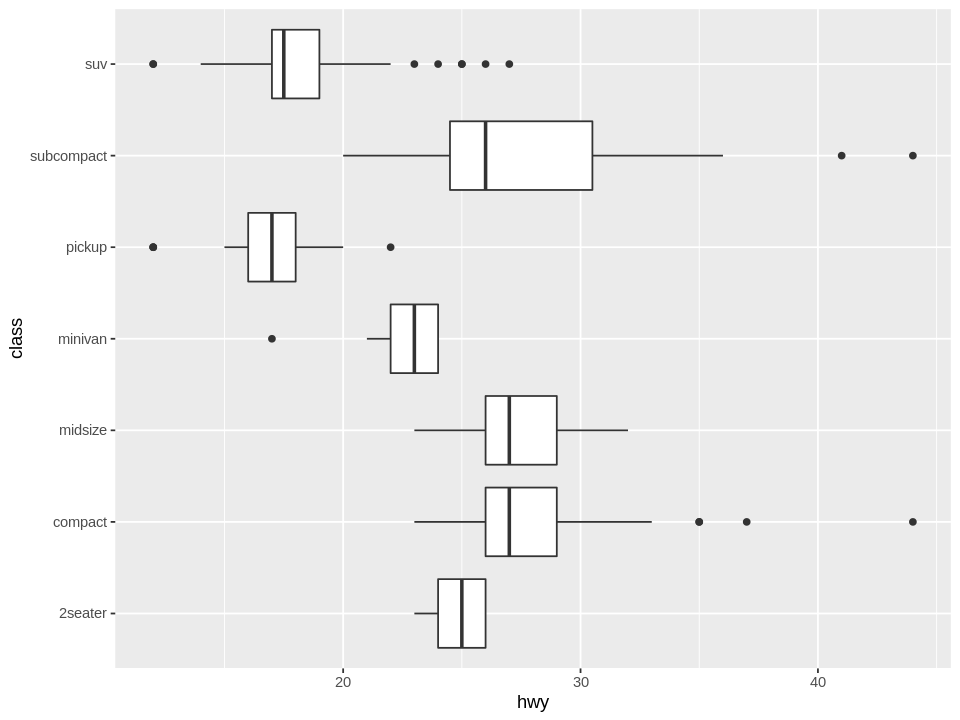

In [26]:
qplot(class, hwy, data = mpg, geom = "boxplot") + coord_flip()

In [27]:
summary(map_data("nz"))
head(map_data("nz"))

      long            lat             group           order       
 Min.   :166.4   Min.   :-47.41   Min.   : 1.00   Min.   :   1.0  
 1st Qu.:170.6   1st Qu.:-44.19   1st Qu.: 1.00   1st Qu.: 388.8  
 Median :173.8   Median :-40.92   Median : 2.00   Median : 777.5  
 Mean   :172.7   Mean   :-40.74   Mean   : 2.34   Mean   : 777.8  
 3rd Qu.:174.8   3rd Qu.:-37.00   3rd Qu.: 2.00   3rd Qu.:1165.2  
 Max.   :178.6   Max.   :-34.40   Max.   :22.00   Max.   :1573.0  
    region           subregion        
 Length:1552        Length:1552       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,172.7433,-34.44215,1,1,North.Island,NA
2,172.7983,-34.45562,1,2,North.Island,NA
3,172.8528,-34.44846,1,3,North.Island,NA
4,172.8986,-34.41786,1,4,North.Island,NA
5,172.9593,-34.42503,1,5,North.Island,NA
6,173.0184,-34.39895,1,6,North.Island,NA


> `coord_quickmap()` sets the aspect ratio correctly for maps.

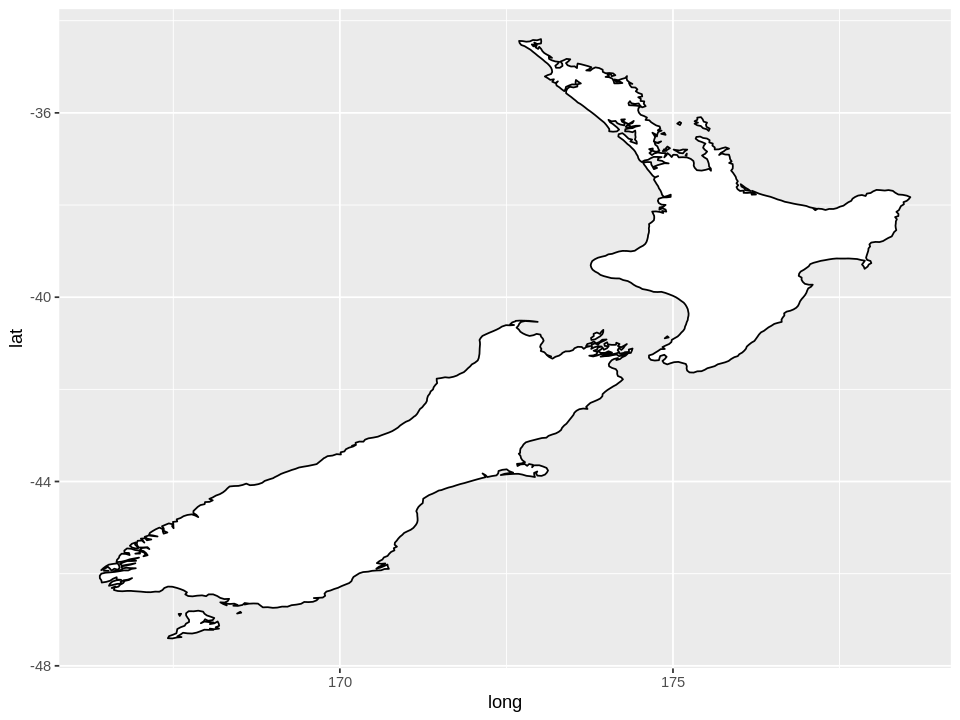

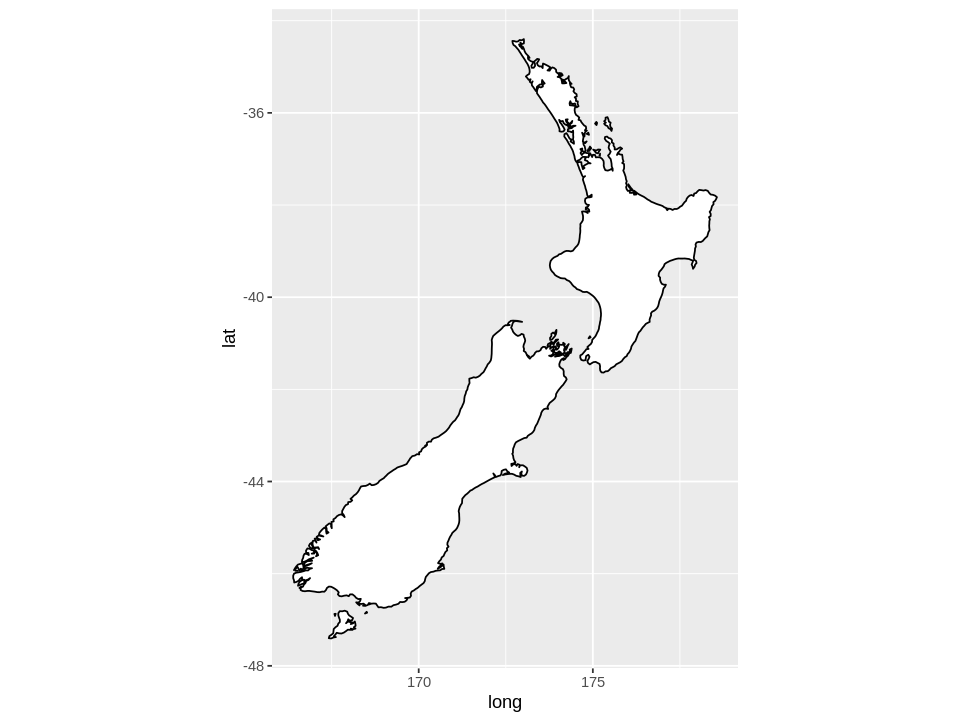

In [28]:
ggplot(map_data("nz")) +
  geom_polygon(aes(long, lat, group = group), fill = "white", color = "black")
ggplot(map_data("nz")) +
  geom_polygon(aes(long, lat, group = group), fill = "white", color = "black") +
  coord_quickmap()

> `coord_polar()` uses polar coordinates. Polar coordinates reveal an interesting connection between a bar chart and a Coxcomb chart:

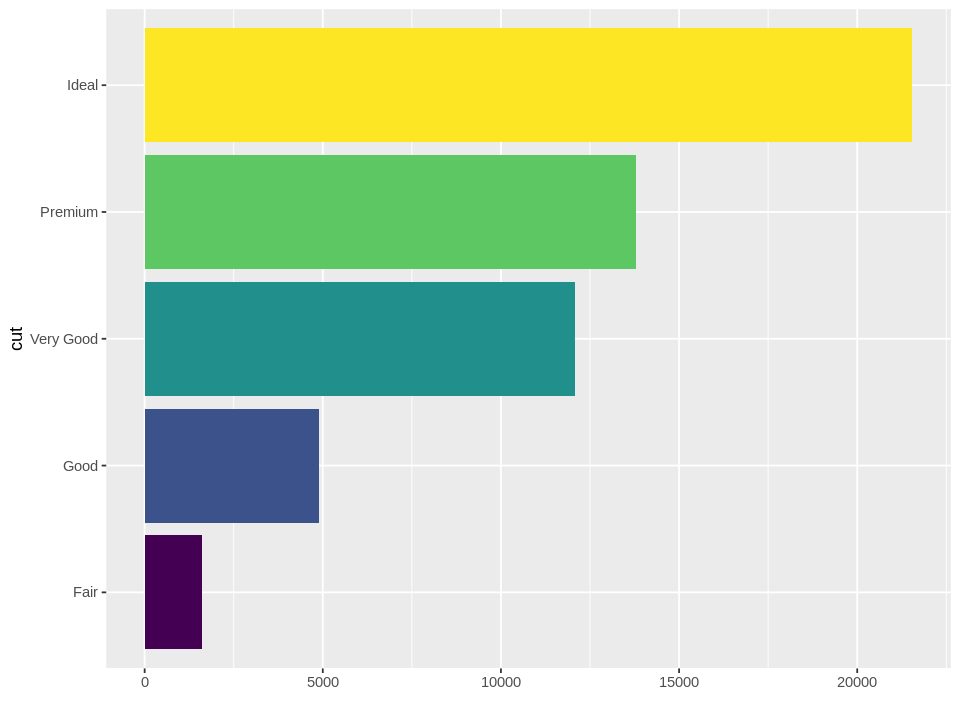

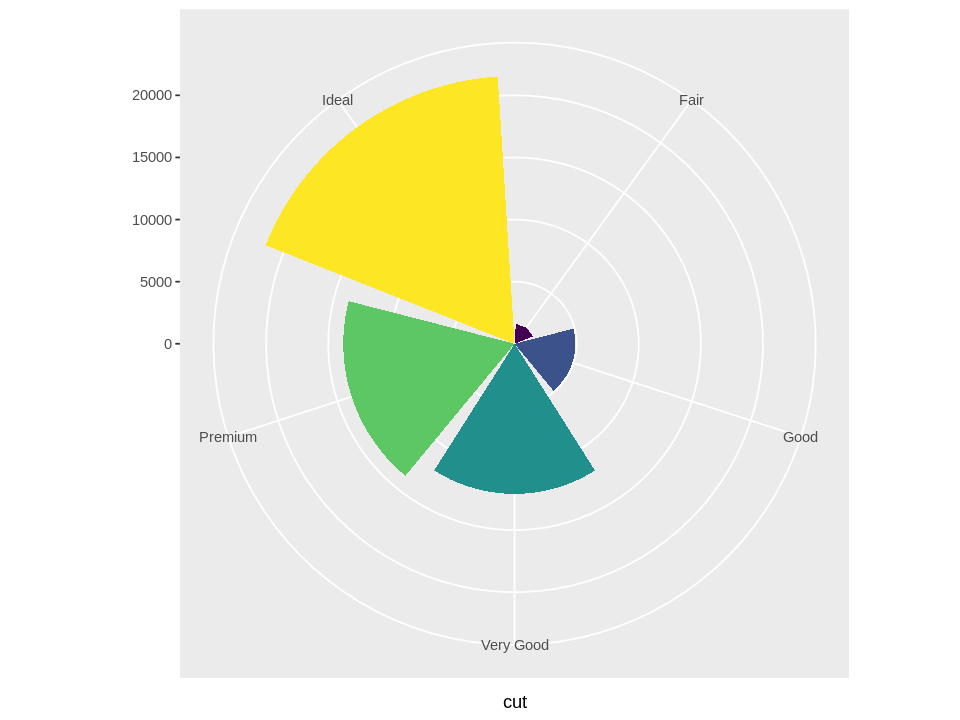

In [29]:
qplot(cut, fill = cut, data = diamonds, geom = "bar", show.legend = FALSE) + coord_flip()
qplot(cut, fill = cut, data = diamonds, geom = "bar", show.legend = FALSE) + coord_polar()

### Exercises

1. Turn a stacked bar chart into a pie chart using `coord_polar()`.
1. What does `labs()` do? Read the documentation.
1. What’s the difference between `coord_quickmap()` and `coord_map()`?
1. What does the following plot tell you about the relationship between city and highway `mpg`? Why is `coord_fixed()` important? What does `geom_abline()` do?

    ```r
    ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
      geom_point() +
      geom_abline() +
      coord_fixed()
    ```

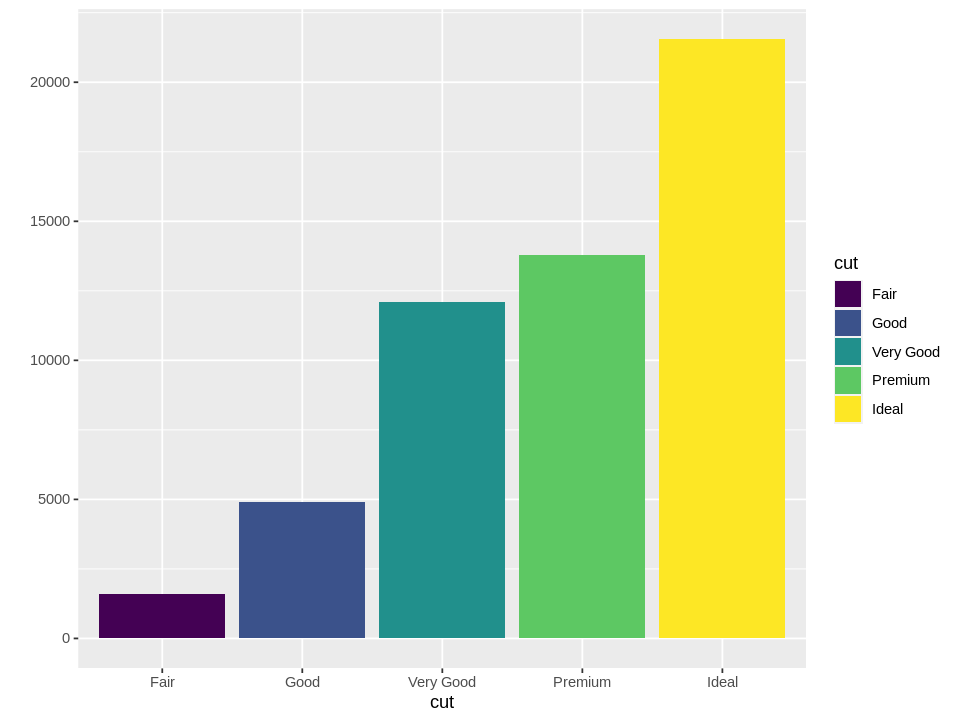

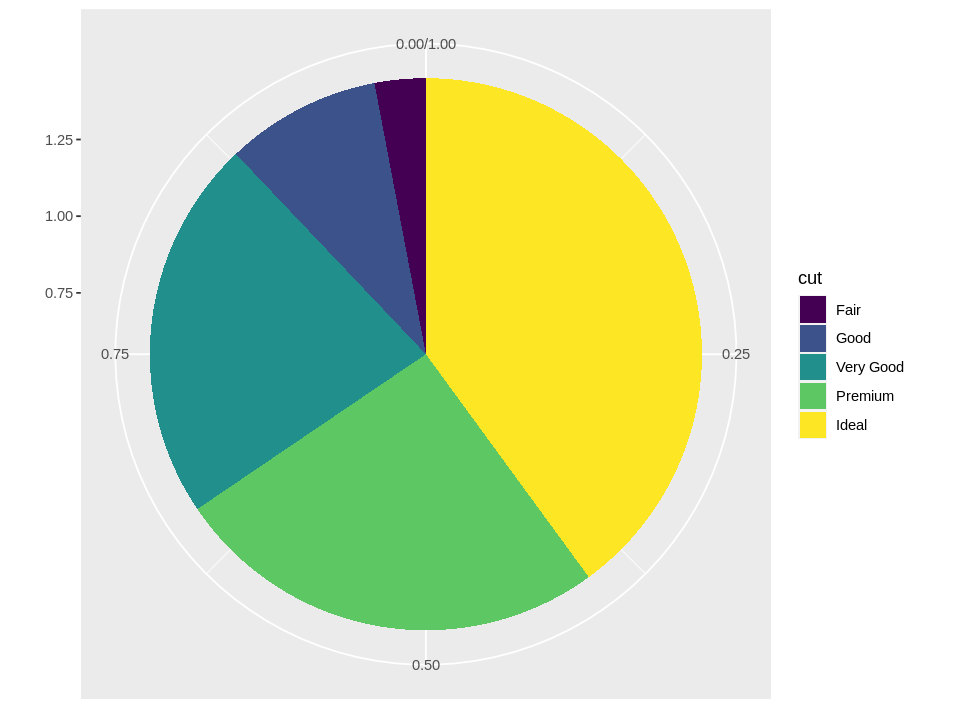

In [30]:
# 1.
qplot(cut, fill = cut, data = diamonds, geom = "bar")

ggplot(diamonds) +
  geom_bar(aes(1, fill = cut), position = "fill") +
  coord_polar("y") +
  labs(x = NULL, y = NULL) 

## The Layered Grammar of Graphics

```
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>,
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

> The seven parameters in the template compose the grammar of graphics, a formal system for building plots. The grammar of graphics is based on the insight that you can uniquely describe any plot as a combination of a dataset, a geom, a set of mappings, a stat, a position adjustment, a coordinate system, and a faceting scheme.
>
> <img width="800" src="https://web.archive.org/web/20201226144700if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_01in39.png" />